In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
from sklearn import metrics
import math
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
import tensorflow as tf 
from xgboost import XGBRegressor
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)


In [2]:
resale_2017 = pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [3]:
resale_2017.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [4]:
resale_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159483 entries, 0 to 159482
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                159483 non-null  object 
 1   town                 159483 non-null  object 
 2   flat_type            159483 non-null  object 
 3   block                159483 non-null  object 
 4   street_name          159483 non-null  object 
 5   storey_range         159483 non-null  object 
 6   floor_area_sqm       159483 non-null  float64
 7   flat_model           159483 non-null  object 
 8   lease_commence_date  159483 non-null  int64  
 9   remaining_lease      159483 non-null  object 
 10  resale_price         159483 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.4+ MB


### Checking for Null Values

In [5]:
resale_2017.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease        False
resale_price           False
dtype: bool

In [6]:
resale_2015 = pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')

In [7]:
resale_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


In [8]:
resale_2015.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease        False
resale_price           False
dtype: bool

In [9]:
resale_2012 = pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')

In [10]:
resale_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


In [11]:
resale_2012.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
resale_price           False
dtype: bool

In [12]:
resale_2012.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

Datasets Before 2012 does not contain least remaining date. The HDB Lease of 99 years begun in 1967, according to HDB. <br> https://www.gov.sg/article/do-i-really-own-my-hdb-flat#:~:text=Since%201967%2C%20all%20sites%20for,your%20loved%20ones%20for%20life. 
<br> Hence it is safe to assume that we are able to calculate the lease_remaining on dataset that are missing that column

In [13]:
resale_1990 = pd.read_csv('ResaleFlatPricesBasedonApprovalDate19901999.csv')

In [14]:
resale_1990.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [15]:
resale_1990.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


In [16]:
resale_1990.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
resale_price           False
dtype: bool

In [17]:
def format_timedelta(timedelta):
    days = timedelta.days
    months = (days) // 30
    return months

In [18]:
import datetime

In [19]:
resale_1990['month'] = pd.to_datetime(resale_1990['month'])
resale_1990['lease_commence_date'] = pd.to_datetime(resale_1990['lease_commence_date'], format = '%Y')
resale_1990['remaining_lease'] = datetime.timedelta(days = 365.25 * 99) - (resale_1990['month'] - resale_1990['lease_commence_date'])

resale_1990['remaining_lease'] = resale_1990['remaining_lease'].apply(lambda x: format_timedelta(x))

In [20]:
resale_1990.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,9000,1047
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977-01-01,6000,1047
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,8000,1047
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977-01-01,6000,1047
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976-01-01,47200,1034


In [21]:
resale_2000 = pd.read_csv('ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')

In [22]:
resale_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB


In [23]:
resale_2000.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
resale_price           False
dtype: bool

In [24]:
resale_2000['month'] = pd.to_datetime(resale_2000['month'])
resale_2000['lease_commence_date'] = pd.to_datetime(resale_2000['lease_commence_date'], format = '%Y')
resale_2000['remaining_lease'] = datetime.timedelta(days = 365.25 * 99) - (resale_2000['month'] - resale_2000['lease_commence_date'])

resale_2000['remaining_lease'] = resale_2000['remaining_lease'].apply(lambda x: format_timedelta(x))

In [25]:
resale_2000.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986-01-01,147000.0,1034
1,2000-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986-01-01,144000.0,1034
2,2000-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976-01-01,159000.0,913
3,2000-01-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976-01-01,167000.0,913
4,2000-01-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976-01-01,163000.0,913


In [26]:
resale_2012['month'] = pd.to_datetime(resale_2012['month'])
resale_2012['lease_commence_date'] = pd.to_datetime(resale_2012['lease_commence_date'], format = '%Y')
resale_2012['remaining_lease'] = datetime.timedelta(days = 365.25 * 99) - (resale_2012['month'] - resale_2012['lease_commence_date'])

resale_2012['remaining_lease'] = resale_2012['remaining_lease'].apply(lambda x: format_timedelta(x))

In [27]:
resale_2015['month'] = pd.to_datetime(resale_2015['month'])
resale_2015['lease_commence_date'] = pd.to_datetime(resale_2015['lease_commence_date'], format = '%Y')
resale_2015['remaining_lease'] = datetime.timedelta(days = 365.25 * 99) - (resale_2015['month'] - resale_2015['lease_commence_date'])

resale_2015['remaining_lease'] = resale_2015['remaining_lease'].apply(lambda x: format_timedelta(x))

In [28]:
resale_2017['month'] = pd.to_datetime(resale_2017['month'])
resale_2017['lease_commence_date'] = pd.to_datetime(resale_2017['lease_commence_date'], format = '%Y')
resale_2017['remaining_lease'] = datetime.timedelta(days = 365.25 * 99) - (resale_2017['month'] - resale_2017['lease_commence_date'])

resale_2017['remaining_lease'] = resale_2017['remaining_lease'].apply(lambda x: format_timedelta(x))

In [29]:
merged_df = pd.concat([resale_2017, resale_2015, resale_2012,resale_2000, resale_1990], ignore_index=True)

In [30]:
merged_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979-01-01,742,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978-01-01,730,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01-01,754,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980-01-01,754,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01-01,754,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
905681,1999-12-01,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987-01-01,1048,456000.0
905682,1999-12-01,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988-01-01,1060,408000.0
905683,1999-12-01,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988-01-01,1060,469000.0
905684,1999-12-01,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988-01-01,1060,440000.0


In [31]:
merged_df['month'] = pd.to_datetime(merged_df['month']).dt.date

In [32]:
merged_df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
905681,1999-12-01,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987-01-01,1048,456000.0
905682,1999-12-01,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988-01-01,1060,408000.0
905683,1999-12-01,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988-01-01,1060,469000.0
905684,1999-12-01,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988-01-01,1060,440000.0
905685,1999-12-01,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,145.0,MAISONETTE,1988-01-01,1060,484000.0


In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905686 entries, 0 to 905685
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                905686 non-null  object        
 1   town                 905686 non-null  object        
 2   flat_type            905686 non-null  object        
 3   block                905686 non-null  object        
 4   street_name          905686 non-null  object        
 5   storey_range         905686 non-null  object        
 6   floor_area_sqm       905686 non-null  float64       
 7   flat_model           905686 non-null  object        
 8   lease_commence_date  905686 non-null  datetime64[ns]
 9   remaining_lease      905686 non-null  int64         
 10  resale_price         905686 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 76.0+ MB


flat_model variables are inconsistent and hence needs to be cleaned

In [ ]:
merged_df['flat_model'] = df['flat_model'].str.replace(r'[-\s]', '').str.upper()

## Data Exploration

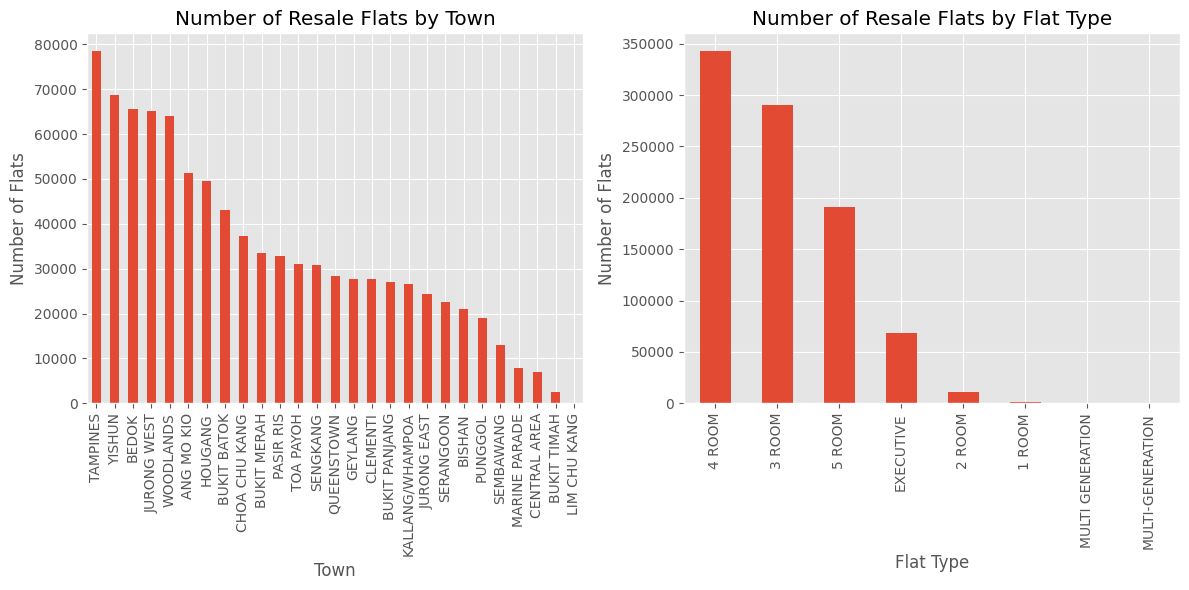

In [34]:
town_counts = merged_df['town'].value_counts()
flat_type_counts = merged_df['flat_type'].value_counts()


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

town_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Number of Resale Flats by Town')
axes[0].set_xlabel('Town')
axes[0].set_ylabel('Number of Flats')

flat_type_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Number of Resale Flats by Flat Type')
axes[1].set_xlabel('Flat Type')
axes[1].set_ylabel('Number of Flats')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

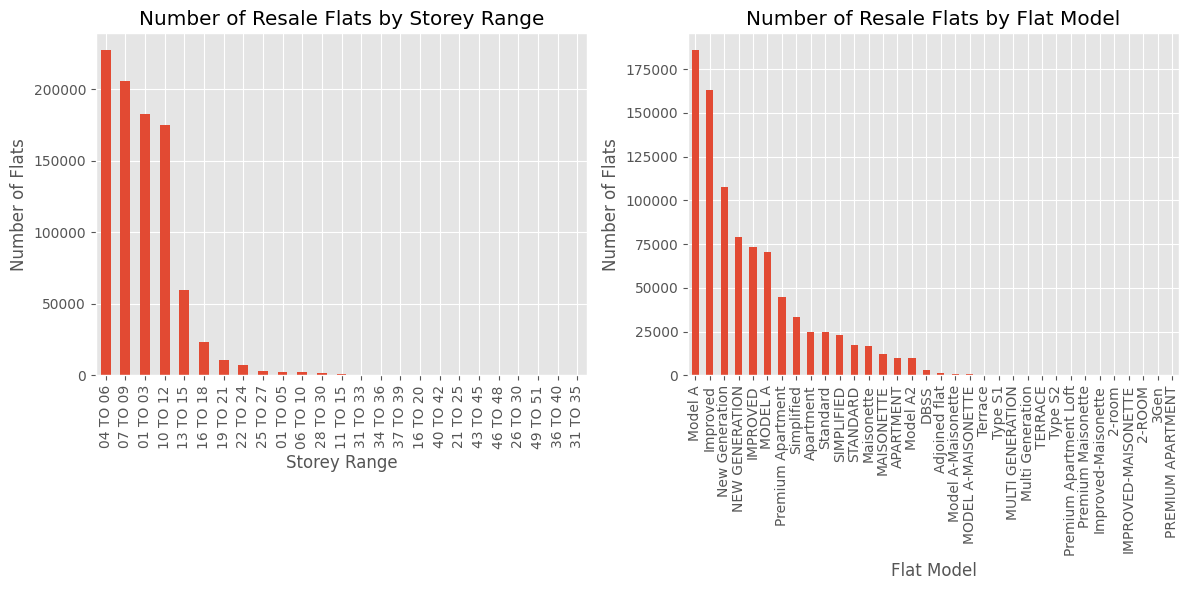

In [35]:
flat_model_counts = merged_df['flat_model'].value_counts()
storey_range_counts = merged_df['storey_range'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
flat_model_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Number of Resale Flats by Flat Model')
axes[1].set_xlabel('Flat Model')
axes[1].set_ylabel('Number of Flats')

storey_range_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Number of Resale Flats by Storey Range')
axes[0].set_xlabel('Storey Range')
axes[0].set_ylabel('Number of Flats')


plt.tight_layout()
plt.show()

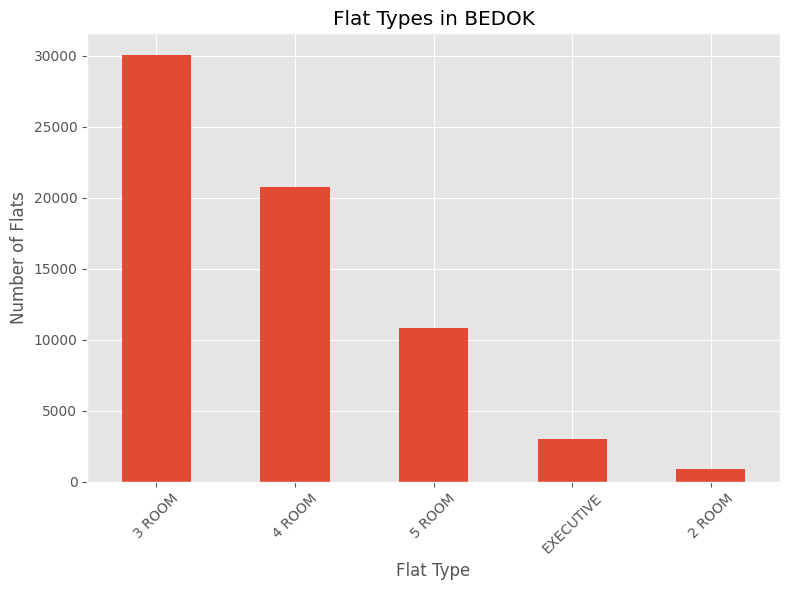

In [36]:
# Choose a specific town
selected_town = 'BEDOK'

# Filter data for the selected town
filtered_df = merged_df[merged_df['town'] == selected_town]

# Count the occurrences of each flat type
flat_type_counts = filtered_df['flat_type'].value_counts()

# Create a bar plot for flat types within the selected town
plt.figure(figsize=(8, 6))
flat_type_counts.plot(kind='bar')
plt.title(f'Flat Types in {selected_town}')
plt.xlabel('Flat Type')
plt.ylabel('Number of Flats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




remaining_lease
1225     1
1221     1
1219     1
1218     1
1217     2
        ..
519      8
518     15
517      5
516      9
509      2
Name: count, Length: 703, dtype: int64


(array([ 400.,  500.,  600.,  700.,  800.,  900., 1000., 1100., 1200.,
        1300.]),
 [Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800'),
  Text(900.0, 0, '900'),
  Text(1000.0, 0, '1000'),
  Text(1100.0, 0, '1100'),
  Text(1200.0, 0, '1200'),
  Text(1300.0, 0, '1300')])

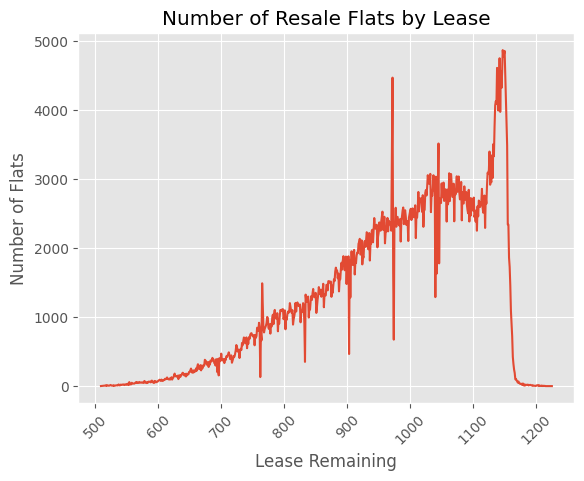

In [37]:
remaining_counts = merged_df['remaining_lease'].value_counts().sort_index(ascending = False)
print(remaining_counts)
fig= figsize=(12, 6)
remaining_counts.plot(kind='line')
plt.title('Number of Resale Flats by Lease')
plt.xlabel('Lease Remaining')
plt.ylabel('Number of Flats')
plt.xticks(rotation = 45)

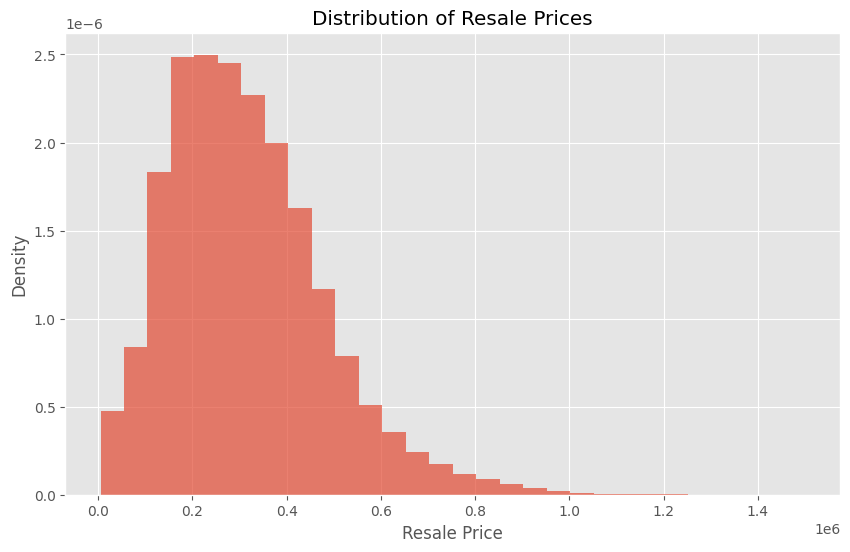

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df['resale_price'], bins=30, density=True, alpha=0.7)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.ylabel('Density')
plt.show()

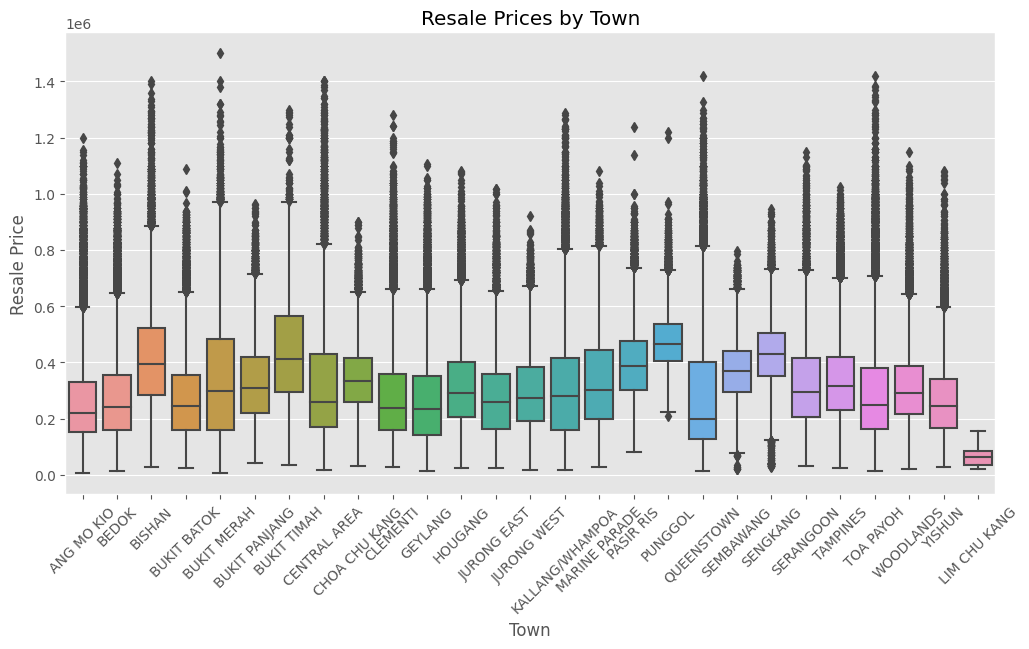

In [39]:
plt.figure(figsize=(12, 6))
sb.boxplot(x='town', y='resale_price', data=merged_df)
plt.title('Resale Prices by Town')
plt.xlabel('Town')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sb.histplot(x='flat_type', y='resale_price', data=merged_df)
plt.title('Resale Prices by Town')
plt.xlabel('flat_type')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)
plt.show()

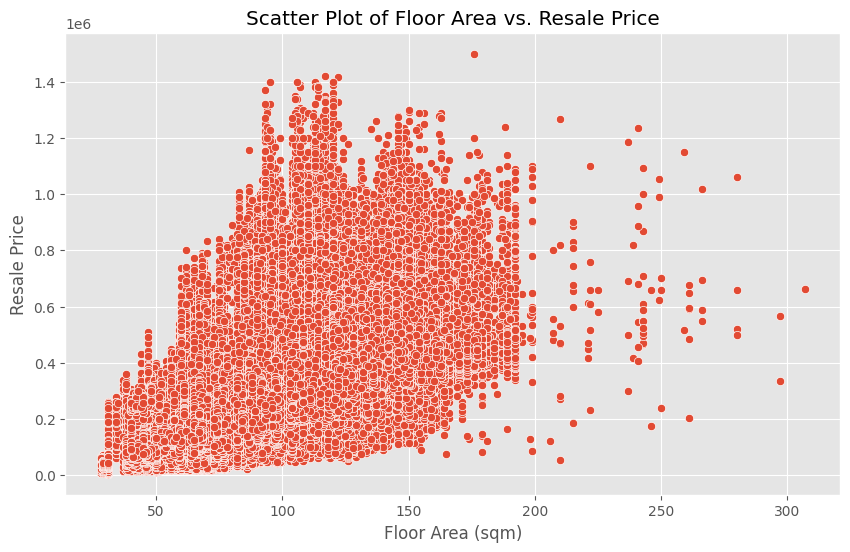

In [40]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='floor_area_sqm', y='resale_price', data=merged_df)
plt.title('Scatter Plot of Floor Area vs. Resale Price')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.show()

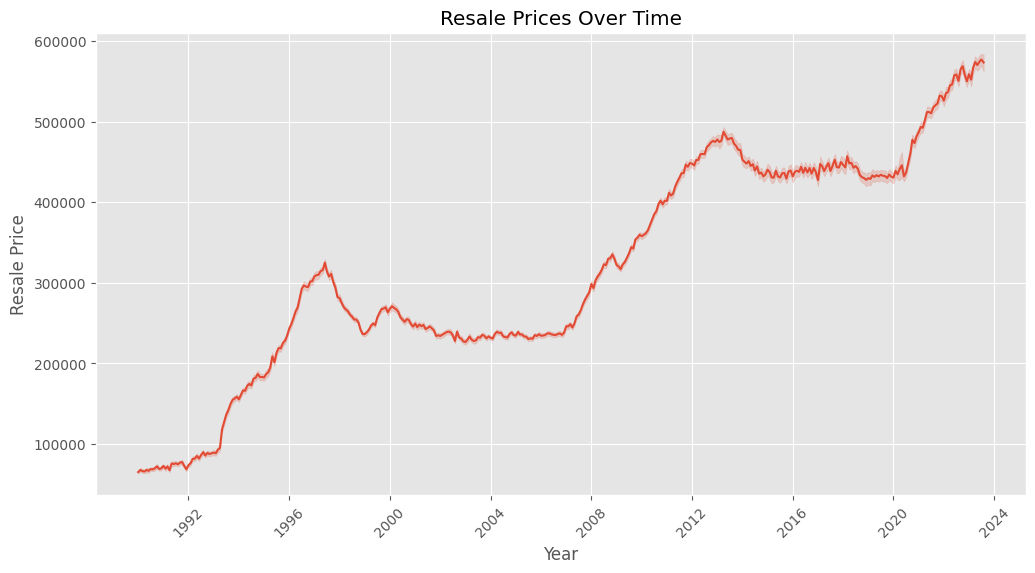

In [41]:

plt.figure(figsize=(12, 6))
sb.lineplot(x='month', y='resale_price', data=merged_df)
plt.title('Resale Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)
plt.show()

Some observations made were that the resale price increases over the years.

Generally the longer the lease remaining, the more the number of resales

town
TAMPINES         78537
YISHUN           68631
BEDOK            65603
JURONG WEST      65194
WOODLANDS        63947
ANG MO KIO       51234
HOUGANG          49466
BUKIT BATOK      43105
CHOA CHU KANG    37348
BUKIT MERAH      33523
Name: count, dtype: int64


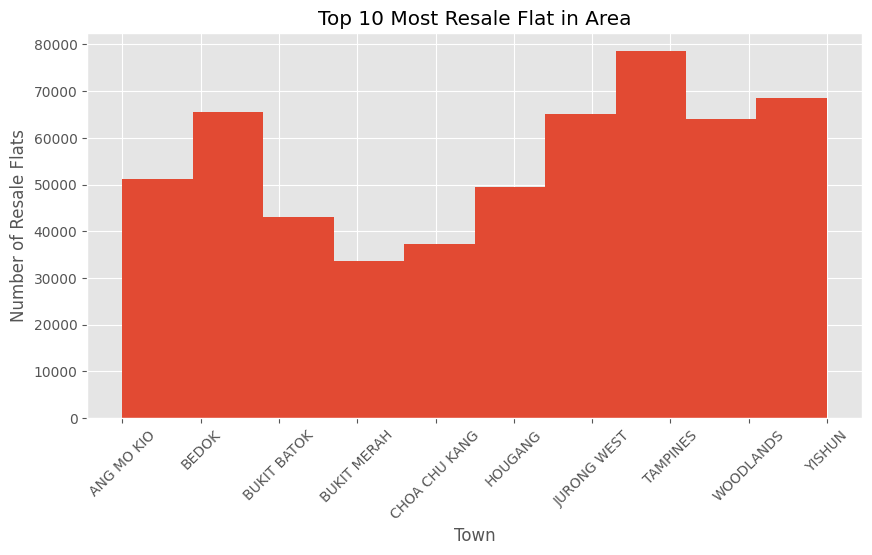

In [42]:
fig = plt.figure(figsize=(10,5))

top_towns = merged_df['town'].value_counts().nlargest(10)

plt.hist(merged_df[merged_df['town'].isin(top_towns.index)]['town'])
plt.xlabel('Town')
plt.ylabel('Number of Resale Flats')
plt.xticks(rotation=45)
plt.title('Top 10 Most Resale Flat in Area')

print(top_towns)

We observed that Tampines has the most number of resale flats in the area.

Converting categorical values to one-hot-encoding for ease in machine learning inputs.

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
encoded_flat = pd.get_dummies(merged_df['flat_type'], prefix='flat_type').astype(int)
encoded_storey = pd.get_dummies(merged_df['storey_range'], prefix='storey_range').astype(int)
encoded_model = pd.get_dummies(merged_df['flat_model'], prefix='flat_model').astype(int)
encoded_town = pd.get_dummies(merged_df['town'], prefix='town').astype(int)


In [45]:
merged_df = pd.concat([merged_df, encoded_flat], axis=1)
merged_df = pd.concat([merged_df, encoded_storey], axis=1)
merged_df = pd.concat([merged_df, encoded_model], axis=1)
merged_df = pd.concat([merged_df, encoded_town], axis=1)


In [46]:
merged_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI GENERATION,flat_type_MULTI-GENERATION,storey_range_01 TO 03,storey_range_01 TO 05,storey_range_04 TO 06,storey_range_06 TO 10,storey_range_07 TO 09,storey_range_10 TO 12,storey_range_11 TO 15,storey_range_13 TO 15,storey_range_16 TO 18,storey_range_16 TO 20,storey_range_19 TO 21,storey_range_21 TO 25,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_26 TO 30,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_31 TO 35,storey_range_34 TO 36,storey_range_36 TO 40,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51,flat_model_2-ROOM,flat_model_2-room,flat_model_3Gen,flat_model_APARTMENT,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_IMPROVED,flat_model_IMPROVED-MAISONETTE,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_MAISONETTE,flat_model_MODEL A,flat_model_MODEL A-MAISONETTE,flat_model_MULTI GENERATION,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_NEW GENERATION,flat_model_New Generation,flat_model_PREMIUM APARTMENT,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_Simplified,flat_model_Standard,flat_model_TERRACE,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_LIM CHU KANG,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979-01-01,742,232000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978-01-01,730,250000.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01-01,754,262000.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980-01-01,754,265000.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01-01,754,265000.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
merged_df.drop(['flat_type', 'storey_range', 'flat_model','town'], axis = 1, inplace = True)

In [48]:
merged_df.head()

,month,block,street_name,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI GENERATION,flat_type_MULTI-GENERATION,storey_range_01 TO 03,storey_range_01 TO 05,storey_range_04 TO 06,storey_range_06 TO 10,storey_range_07 TO 09,storey_range_10 TO 12,storey_range_11 TO 15,storey_range_13 TO 15,storey_range_16 TO 18,storey_range_16 TO 20,storey_range_19 TO 21,storey_range_21 TO 25,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_26 TO 30,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_31 TO 35,storey_range_34 TO 36,storey_range_36 TO 40,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51,flat_model_2-ROOM,flat_model_2-room,flat_model_3Gen,flat_model_APARTMENT,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_IMPROVED,flat_model_IMPROVED-MAISONETTE,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_MAISONETTE,flat_model_MODEL A,flat_model_MODEL A-MAISONETTE,flat_model_MULTI GENERATION,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_NEW GENERATION,flat_model_New Generation,flat_model_PREMIUM APARTMENT,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_Simplified,flat_model_Standard,flat_model_TERRACE,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_LIM CHU KANG,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,2017-01-01,406,ANG MO KIO AVE 10,44.0,1979-01-01,742,232000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-01,108,ANG MO KIO AVE 4,67.0,1978-01-01,730,250000.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-01,602,ANG MO KIO AVE 5,67.0,1980-01-01,754,262000.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-01,465,ANG MO KIO AVE 10,68.0,1980-01-01,754,265000.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,601,ANG MO KIO AVE 5,67.0,1980-01-01,754,265000.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
merged_df.columns

Index(['month', 'block', 'street_name', 'floor_area_sqm',
       'lease_commence_date', 'remaining_lease', 'resale_price',
       'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       ...
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN'],
      dtype='object', length=101)

In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905686 entries, 0 to 905685
Columns: 101 entries, month to town_YISHUN
dtypes: datetime64[ns](1), float64(2), int32(94), int64(1), object(3)
memory usage: 373.1+ MB


In [51]:
removal_list = ['month','remaining_lease','lease_commence_date', 'street_name', 'block']

In [52]:
merged_df.drop(columns = removal_list, axis = 1,inplace = True)

In [53]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905686 entries, 0 to 905685
Data columns (total 96 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   floor_area_sqm                     905686 non-null  float64
 1   resale_price                       905686 non-null  float64
 2   flat_type_1 ROOM                   905686 non-null  int32  
 3   flat_type_2 ROOM                   905686 non-null  int32  
 4   flat_type_3 ROOM                   905686 non-null  int32  
 5   flat_type_4 ROOM                   905686 non-null  int32  
 6   flat_type_5 ROOM                   905686 non-null  int32  
 7   flat_type_EXECUTIVE                905686 non-null  int32  
 8   flat_type_MULTI GENERATION         905686 non-null  int32  
 9   flat_type_MULTI-GENERATION         905686 non-null  int32  
 10  storey_range_01 TO 03              905686 non-null  int32  
 11  storey_range_01 TO 05              9056

In [54]:
corr_matrix = merged_df.corr()

<Axes: >

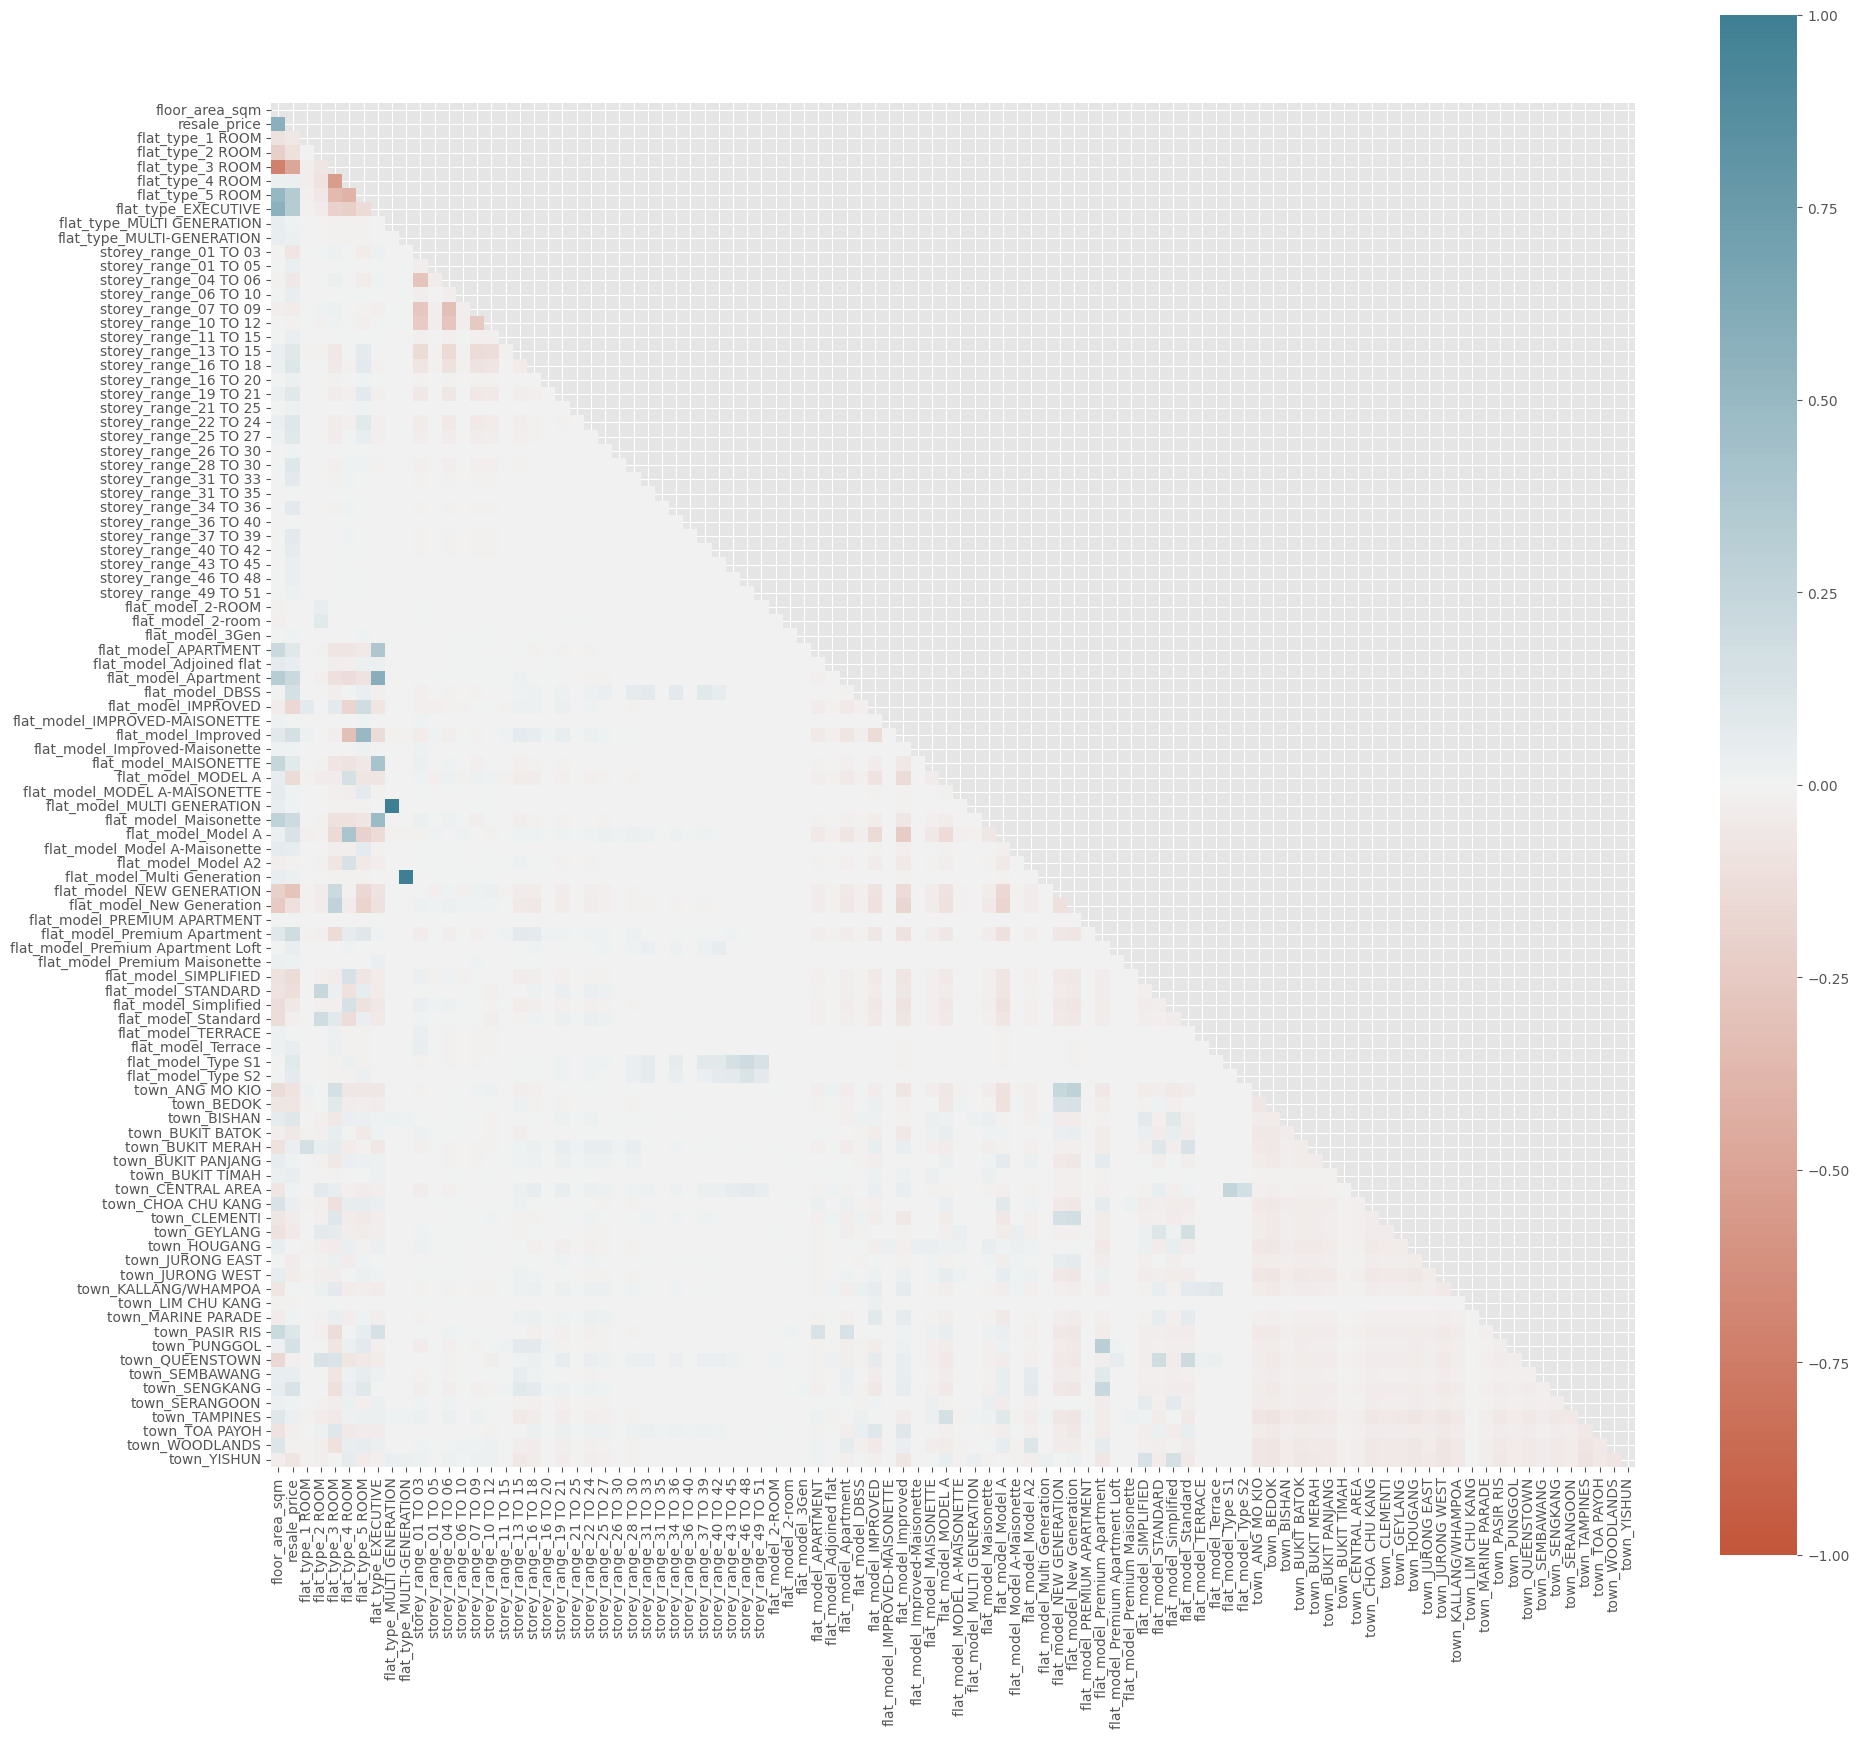

In [55]:
f,ax = plt.subplots(figsize=(22,20))

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

sb.heatmap(corr_matrix,mask = mask ,cmap = sb.diverging_palette(20,220, as_cmap= True), vmin = -1.0, vmax = 1.0, square = True, ax = ax,xticklabels= 1 , yticklabels= 1)

In [56]:
corr_matrix['resale_price'].sort_values(ascending = False)

resale_price                 1.000000
floor_area_sqm               0.577868
flat_type_5 ROOM             0.340542
flat_type_EXECUTIVE          0.330005
flat_model_Apartment         0.212269
                               ...   
flat_model_SIMPLIFIED       -0.133512
flat_model_MODEL A          -0.136427
flat_model_IMPROVED         -0.162256
flat_model_NEW GENERATION   -0.294429
flat_type_3 ROOM            -0.482837
Name: resale_price, Length: 96, dtype: float64

### Normalisation

In [57]:
scale_columns = merged_df.columns.to_list()
scale_columns.remove('resale_price')


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_df[scale_columns] = scaler.fit_transform(merged_df[scale_columns])

The objective of the project is to identify features that correlates or able to predict resale_price

### Splitting Variables to train_test

In [58]:
y_variables = merged_df['resale_price']
x_variables = merged_df.drop('resale_price', axis = 1)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(x_variables,y_variables,test_size = 0.2)

### Metric Report

In [60]:
def metric_report(y_test,y_pred):
    
    r2Score = metrics.r2_score(y_test,y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_test,y_pred)
    mean_squared_error = math.sqrt(metrics.mean_squared_error(y_test,y_pred))

    
    print(f"R2 Score: {r2Score:.4f}")
    print(f"Mean Absolute Error: {mean_absolute_error:.4f}")
    print(f"Mean Squared Error: {mean_squared_error:.4f}")
    
    return {'R2 Score' : f'{r2Score:.4f}', 'Mean Absolute Error' : f'{mean_absolute_error:.4f}', 'Mean Squared Error' : f'{mean_squared_error:.4f}'}

In [61]:
def plot_relation_graph(truth_value,predicted_value):
    plt.figure(figsize=(10,10))
    plt.scatter(truth_value, predicted_value, c='crimson')


    plt.plot([truth_value.min(), truth_value.max()], [truth_value.min(), truth_value.max()], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
    

In [62]:
results = {}

### Initial Machine Learning Modelling

Our observations were that floor_area_sqm and resale_price have a positive correlation. Hence we decide to explore further in predicting resale_price using floor_area_sqm

In [63]:
x_train_list = ['floor_area_sqm']

In [64]:
logr = linear_model.LinearRegression()

logr.fit(X_train[x_train_list],y_train)



y_pred = logr.predict(X_test[x_train_list])


results["linear_reg"] = metric_report(y_test,y_pred)

R2 Score: 0.3326
Mean Absolute Error: 103766.0252
Mean Squared Error: 134749.6280


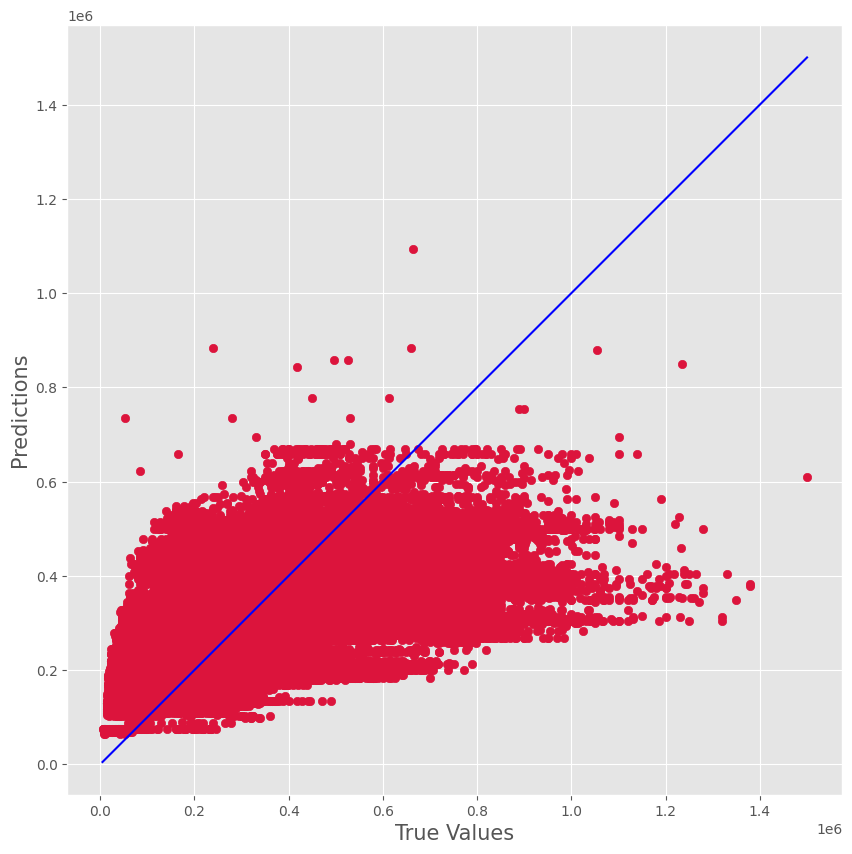

In [65]:
plot_relation_graph(y_test,y_pred)

### Decision Tree

In [66]:
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=10, max_leaf_nodes=200)

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

results["decision_tree"] = metric_report(y_test,y_pred)

R2 Score: 0.5844
Mean Absolute Error: 82324.0762
Mean Squared Error: 106328.2701


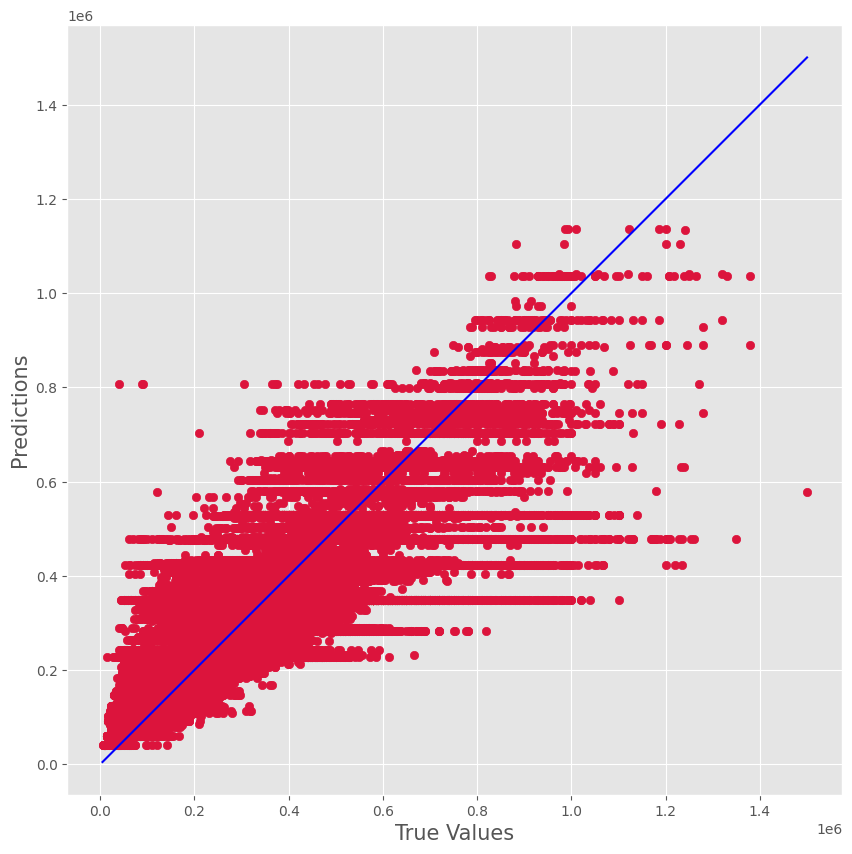

In [67]:
plot_relation_graph(y_test,y_pred)

### Random Forest

In [68]:
rf_reg = RandomForestRegressor(n_estimators= 200,max_depth= 10, min_samples_split = 5, min_samples_leaf = 5, bootstrap= True, random_state= 50)

rf_reg.fit(X_train,y_train)

y_pred = rf_reg.predict(X_test)
results["random_forest"] = metric_report(y_test,y_pred,)

R2 Score: 0.5890
Mean Absolute Error: 82121.2830
Mean Squared Error: 105742.8124


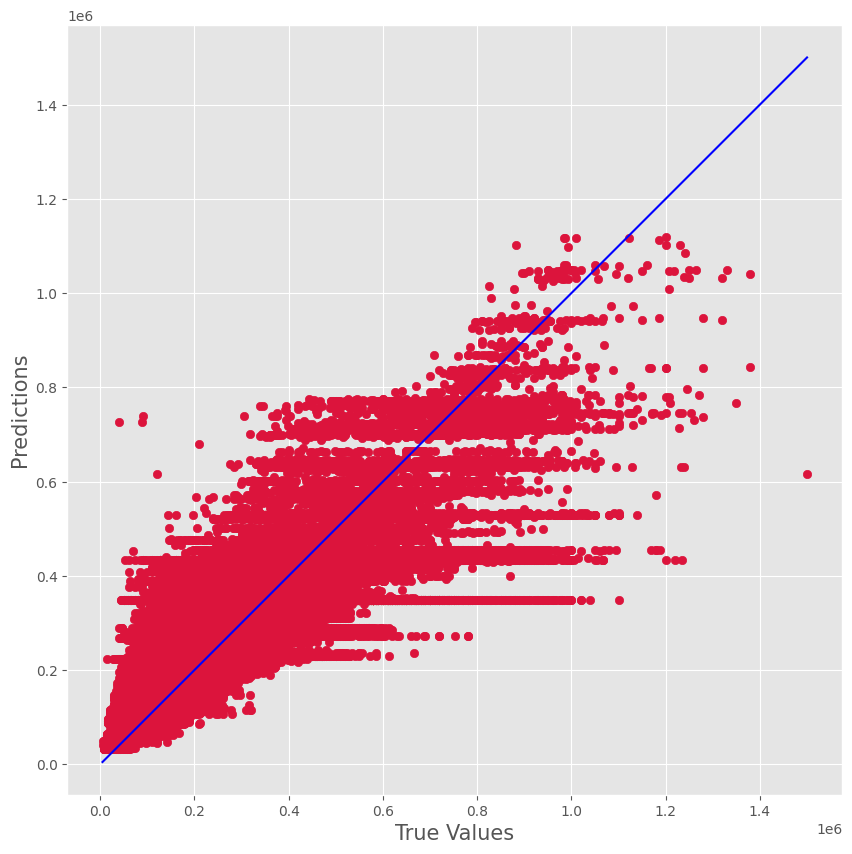

In [69]:
plot_relation_graph(y_test,y_pred)

### Neural Network

In [70]:
clf = MLPRegressor(hidden_layer_sizes=(32,64,64,32), max_iter=1000)

clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)


results["neural_network"] = metric_report(y_test,y_pred)

R2 Score: 0.6945
Mean Absolute Error: 73704.2666
Mean Squared Error: 91160.2865


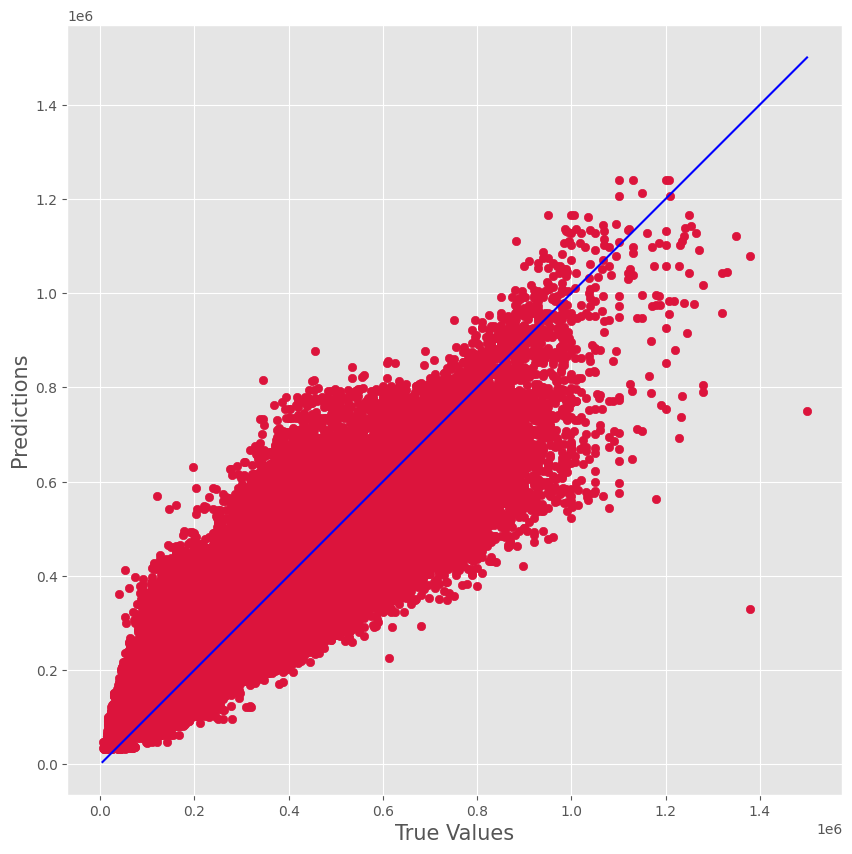

In [71]:
plot_relation_graph(y_test,y_pred)

In [72]:

def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [73]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_shape = (len(X_train.columns.to_list()),), activation = 'relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(loss= root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics = [tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredError()])
    return model

In [74]:
def build_model_1():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_shape = (1,), activation = 'relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(loss= root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics = [tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredError()])
    return model

In [75]:
model = build_model()

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3072      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11457 (44.75 KB)
Trainable params: 11457 (44.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
early_stop = tf.keras.callbacks.EarlyStopping(patience = 5)

In [78]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [total_energy_fan]')
  plt.legend()
  plt.grid(True)

Epoch 1/500


22643/22643 [==============================] - 23s 978us/step - loss: 103802.5547 - mean_absolute_error: 83785.0234 - mean_squared_error: 11601297408.0000 - val_loss: 98693.7031 - val_mean_absolute_error: 79712.9688 - val_mean_squared_error: 9922515968.0000
Epoch 2/500
22643/22643 [==============================] - 22s 960us/step - loss: 97595.5312 - mean_absolute_error: 78921.0703 - mean_squared_error: 9716770816.0000 - val_loss: 97240.2109 - val_mean_absolute_error: 78765.9531 - val_mean_squared_error: 9634870272.0000
Epoch 3/500
22643/22643 [==============================] - 22s 950us/step - loss: 96860.9844 - mean_absolute_error: 78363.3203 - mean_squared_error: 9567466496.0000 - val_loss: 96468.2500 - val_mean_absolute_error: 78015.7734 - val_mean_squared_error: 9490518016.0000
Epoch 4/500
22643/22643 [==============================] - 22s 955us/step - loss: 96418.3594 - mean_absolute_error: 78047.9219 - mean_squared_error: 9477568512.0000 - val_loss: 96287.8750 - val_mean_absolut

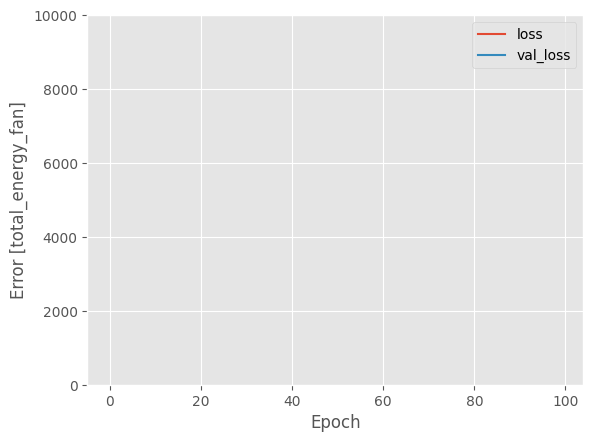

In [79]:
# Train the model
history_2 = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test),callbacks = [early_stop])


# Predict using the model

y_pred = model.predict(X_test)


# Evaluate the model
loss_2 = model.evaluate(X_test, y_test)

# Print the loss
print("Test loss:", loss_2)
  
plot_loss(history_2)


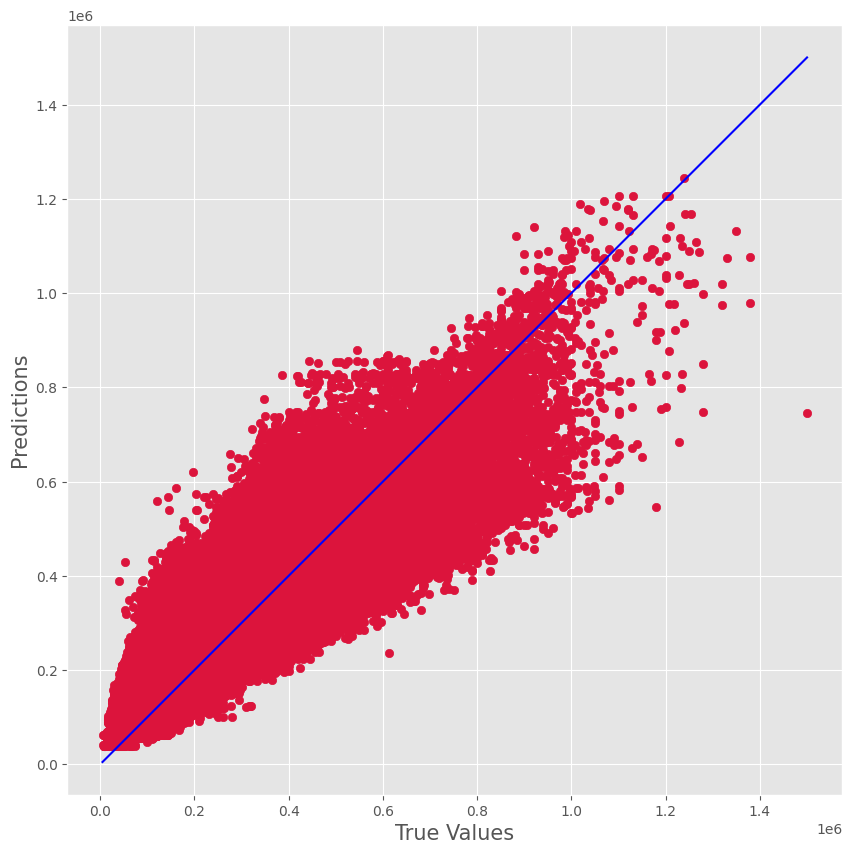

In [80]:
plot_relation_graph(y_test,y_pred)

In [81]:
results["tf"] = metric_report(y_test,y_pred)

R2 Score: 0.6878
Mean Absolute Error: 74392.5629
Mean Squared Error: 92156.5706


In [82]:
xgb = XGBRegressor()

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

results["xgboost"] = metric_report(y_test,y_pred)

R2 Score: 0.6945
Mean Absolute Error: 73645.0204
Mean Squared Error: 91173.3571


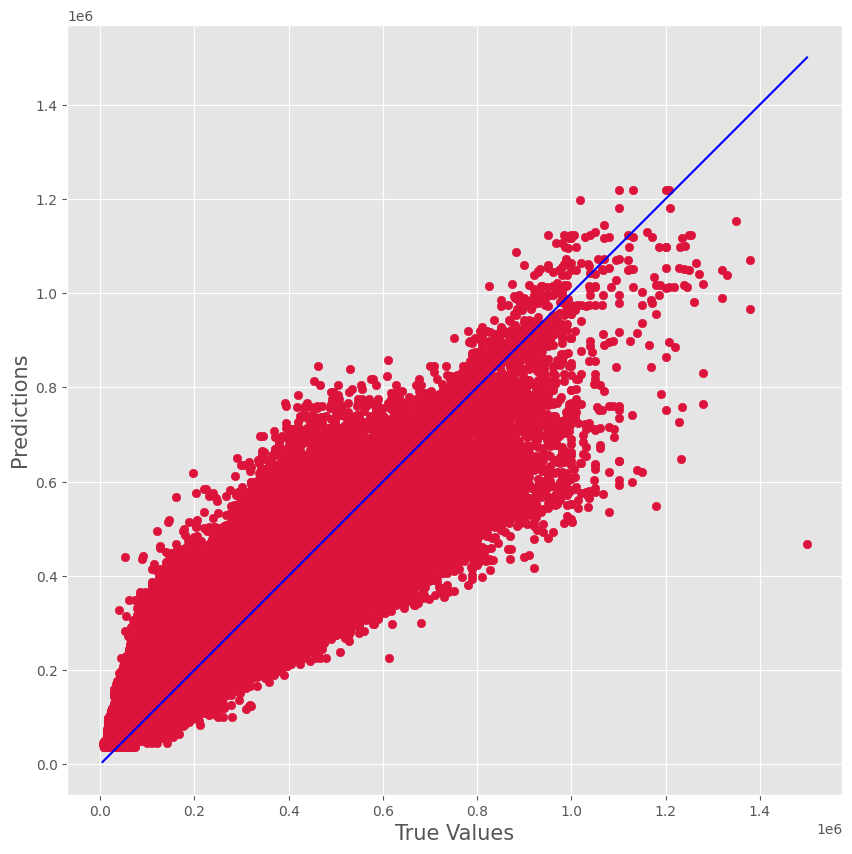

In [83]:
plot_relation_graph(y_test,y_pred)

In [84]:
from tabulate import tabulate

table = []
headers = ['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Squared Error']

for item in results:
    model_data = [item]
    model_data.extend([results[item][metric] for metric in headers[1:]])
    table.append(model_data)

print(tabulate(table, headers, tablefmt='grid'))

+----------------+------------+-----------------------+----------------------+
| Model          |   R2 Score |   Mean Absolute Error |   Mean Squared Error |
+================+============+=======================+======================+
| linear_reg     |     0.3326 |              103766   |             134750   |
+----------------+------------+-----------------------+----------------------+
| decision_tree  |     0.5844 |               82324.1 |             106328   |
+----------------+------------+-----------------------+----------------------+
| random_forest  |     0.589  |               82121.3 |             105743   |
+----------------+------------+-----------------------+----------------------+
| neural_network |     0.6945 |               73704.3 |              91160.3 |
+----------------+------------+-----------------------+----------------------+
| tf             |     0.6878 |               74392.6 |              92156.6 |
+----------------+------------+---------------------

### Feature Selection Algorithm

Utilise SelectKBest Algorithm

In [85]:


# Assuming X_train and y_train are your training data

# Create an instance of SelectKBest with the desired number of features (K)
k = 10 # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector to the training data
selector.fit(X_train, y_train)

# Get the selected features
selected_features = selector.get_support(indices=True)
print(selected_features)


[ 0  3  5  6 39 41 43 49 54 57]


In [86]:
x_train_list = X_train.columns[selected_features].to_list()

In [87]:
print(x_train_list)

['floor_area_sqm', 'flat_type_3 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_model_Apartment', 'flat_model_IMPROVED', 'flat_model_Improved', 'flat_model_Maisonette', 'flat_model_NEW GENERATION', 'flat_model_Premium Apartment']


## Linear Regression

In [88]:
logr = linear_model.LinearRegression()

logr.fit(X_train[x_train_list],y_train)



y_pred = logr.predict(X_test[x_train_list])


results["linear_reg"] = metric_report(y_test,y_pred)

R2 Score: 0.4296
Mean Absolute Error: 95401.1897
Mean Squared Error: 124574.9571


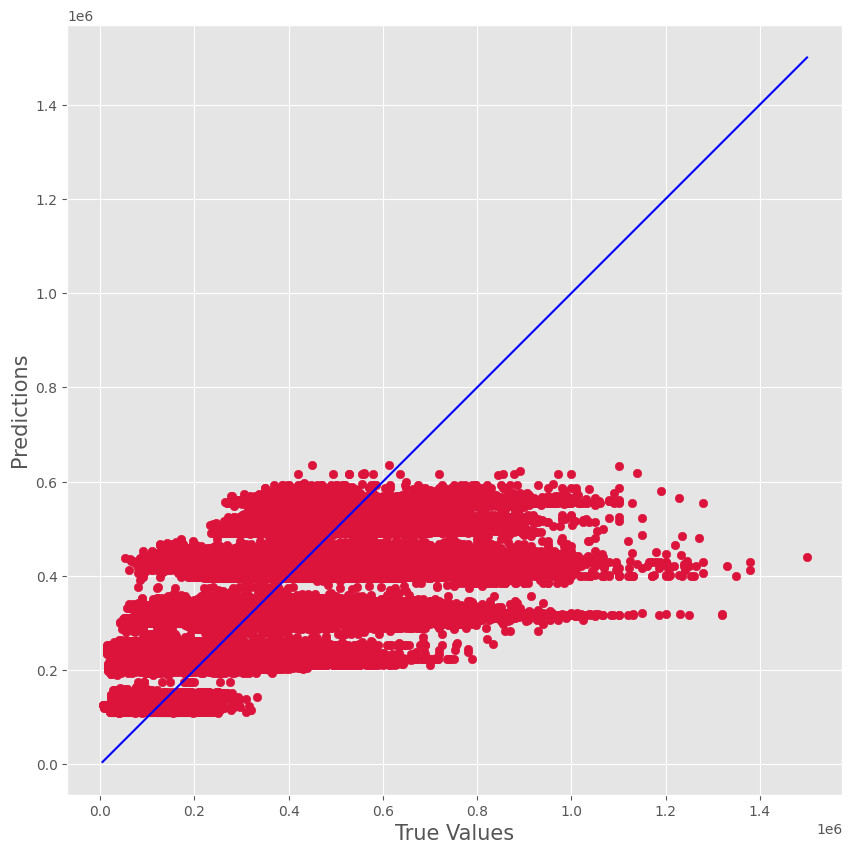

In [89]:
plot_relation_graph(y_test,y_pred)

### Decision Tree

In [90]:
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=10, max_leaf_nodes=200)

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

results["decision_tree"] = metric_report(y_test,y_pred)

R2 Score: 0.5844
Mean Absolute Error: 82324.0762
Mean Squared Error: 106328.2701


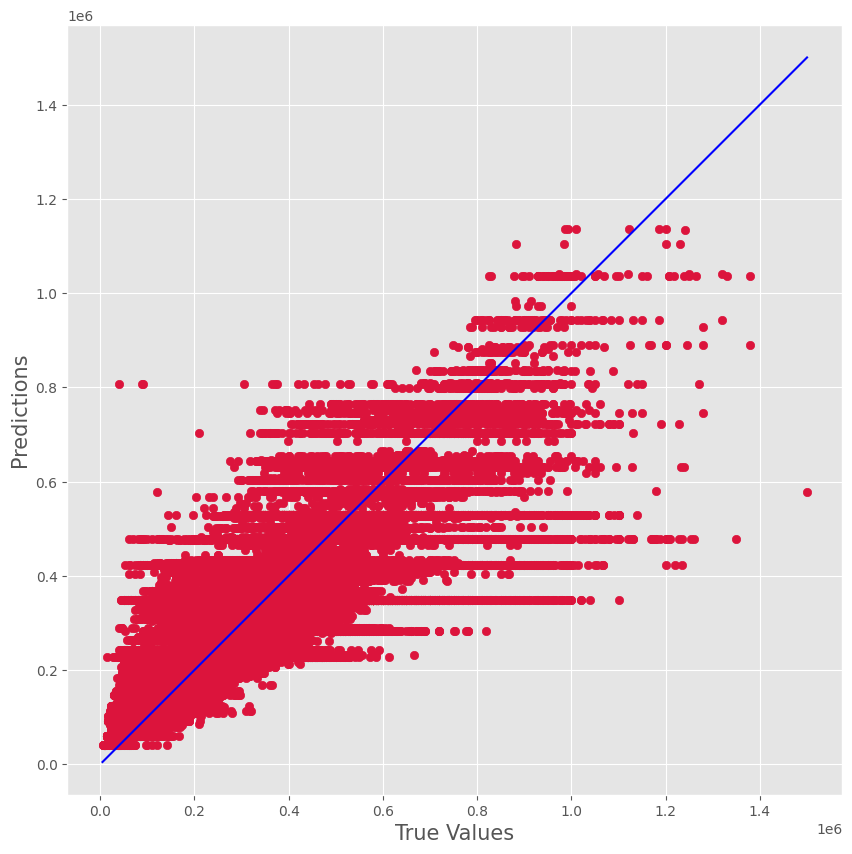

In [91]:
plot_relation_graph(y_test,y_pred)

### Random Forest

In [92]:
rf_reg = RandomForestRegressor(n_estimators= 200,max_depth= 10, min_samples_split = 5, min_samples_leaf = 5, bootstrap= True, random_state= 50)

rf_reg.fit(X_train,y_train)

y_pred = rf_reg.predict(X_test)
results["random_forest"] = metric_report(y_test,y_pred,)

R2 Score: 0.5890
Mean Absolute Error: 82121.2830
Mean Squared Error: 105742.8124


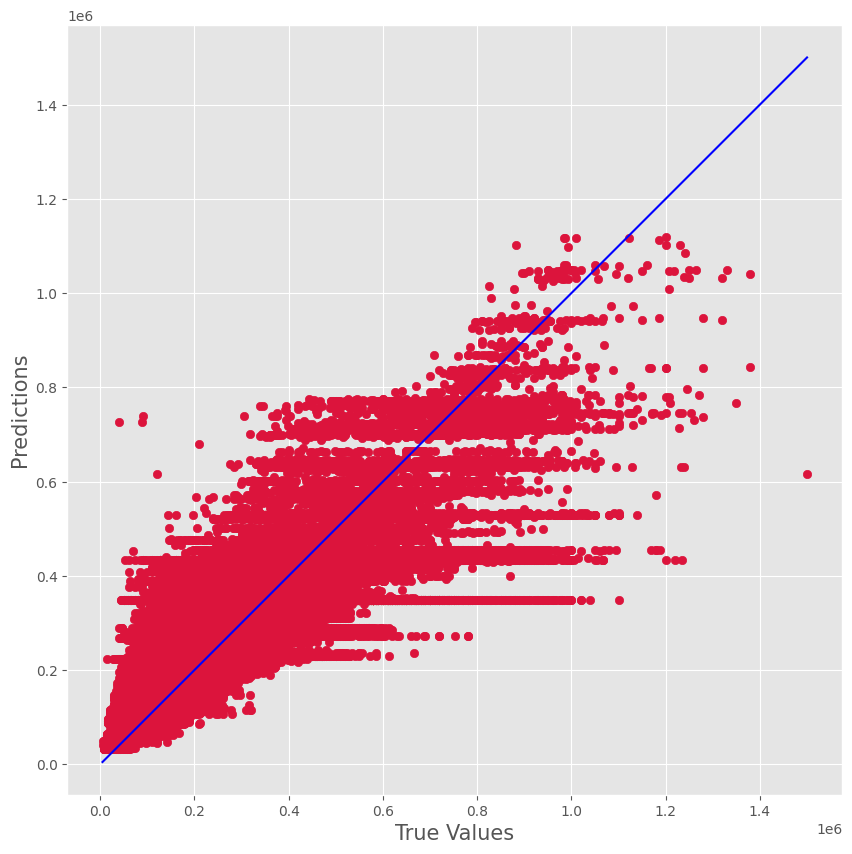

In [93]:
plot_relation_graph(y_test,y_pred)

### Neural Network

In [94]:
clf = MLPRegressor(hidden_layer_sizes=(32,64,64,32), max_iter=1000)

clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)


results["neural_network"] = metric_report(y_test,y_pred)

R2 Score: 0.6938
Mean Absolute Error: 73594.4952
Mean Squared Error: 91265.9476


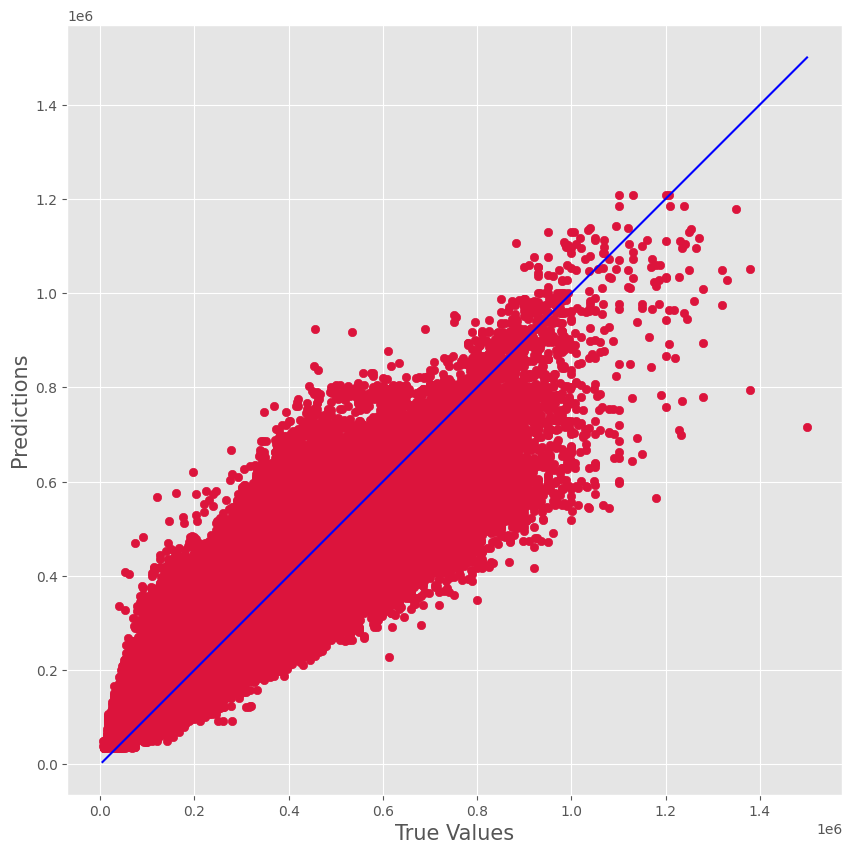

In [95]:
plot_relation_graph(y_test,y_pred)

In [96]:

def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [97]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_shape = (len(X_train.columns.to_list()),), activation = 'relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(loss= root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics = [tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredError()])
    return model

In [98]:
def build_model_1():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_shape = (1,), activation = 'relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(loss= root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics = [tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredError()])
    return model

In [99]:
model = build_model()

In [100]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                3072      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11457 (44.75 KB)
Trainable params: 11457 (44.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
early_stop = tf.keras.callbacks.EarlyStopping(patience = 5)

In [102]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [total_energy_fan]')
  plt.legend()
  plt.grid(True)

Epoch 1/500
  660/22643 [..............................] - ETA: 20s - loss: 199869.2188 - mean_absolute_error: 166367.2344 - mean_squared_error: 50218004480.0000

22643/22643 [==============================] - 23s 979us/step - loss: 103492.6094 - mean_absolute_error: 83585.2578 - mean_squared_error: 11512453120.0000 - val_loss: 97971.4062 - val_mean_absolute_error: 79229.0391 - val_mean_squared_error: 9793758208.0000
Epoch 2/500
22643/22643 [==============================] - 21s 942us/step - loss: 97345.7734 - mean_absolute_error: 78763.4531 - mean_squared_error: 9666379776.0000 - val_loss: 96909.2656 - val_mean_absolute_error: 78375.5469 - val_mean_squared_error: 9577623552.0000
Epoch 3/500
22643/22643 [==============================] - 22s 952us/step - loss: 96712.1406 - mean_absolute_error: 78272.8203 - mean_squared_error: 9539439616.0000 - val_loss: 97052.8672 - val_mean_absolute_error: 78239.0859 - val_mean_squared_error: 9622676480.0000
Epoch 4/500
22643/22643 [==============================] - 22s 952us/step - loss: 96381.7266 - mean_absolute_error: 78002.5312 - mean_squared_error: 9470851072.0000 - val_loss: 96168.5938 - val_mean_absolut

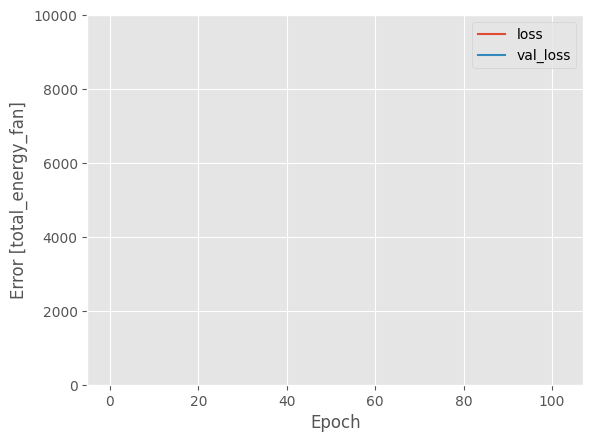

In [103]:
# Train the model
history_2 = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test),callbacks = [early_stop])


# Predict using the model

y_pred = model.predict(X_test)


# Evaluate the model
loss_2 = model.evaluate(X_test, y_test)

# Print the loss
print("Test loss:", loss_2)
  
plot_loss(history_2)


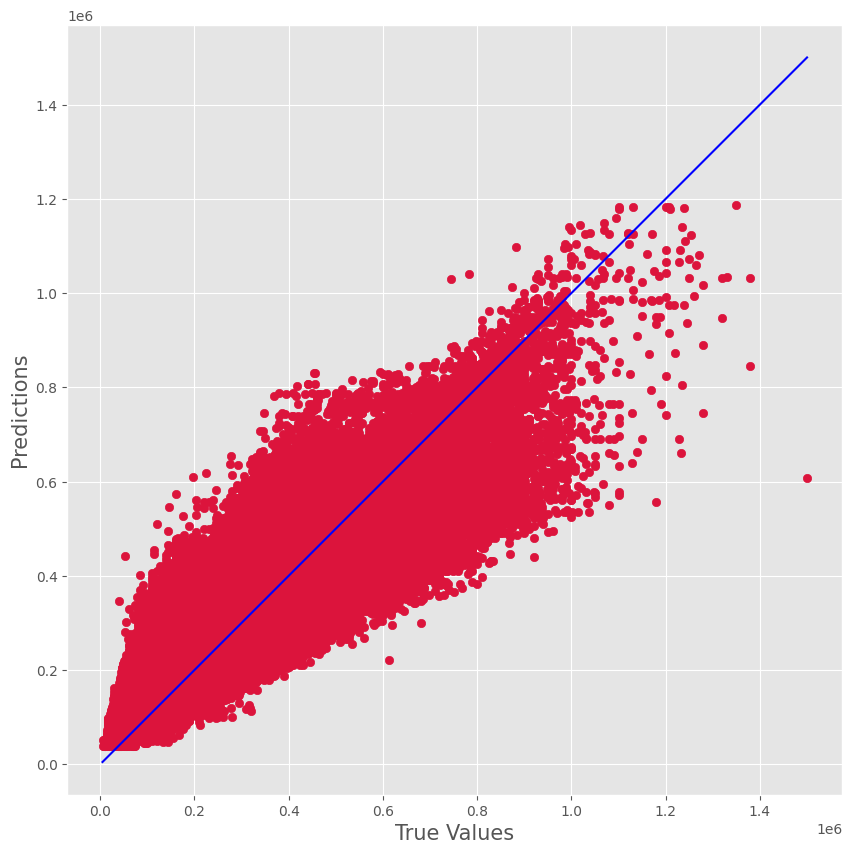

In [104]:
plot_relation_graph(y_test,y_pred)

In [105]:
results["tf"] = metric_report(y_test,y_pred)

R2 Score: 0.6922
Mean Absolute Error: 73805.1263
Mean Squared Error: 91515.0084


In [106]:
xgb = XGBRegressor()

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

results["xgboost"] = metric_report(y_test,y_pred)

R2 Score: 0.6945
Mean Absolute Error: 73645.0204
Mean Squared Error: 91173.3571


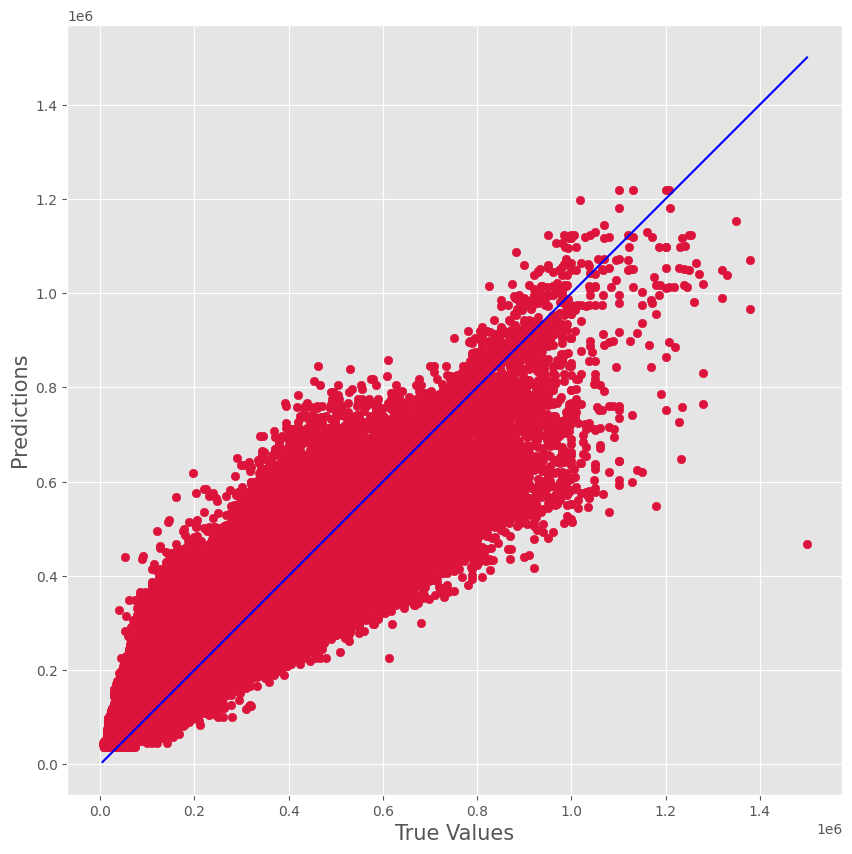

In [107]:
plot_relation_graph(y_test,y_pred)

In [108]:
from tabulate import tabulate

table = []
headers = ['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Squared Error']

for item in results:
    model_data = [item]
    model_data.extend([results[item][metric] for metric in headers[1:]])
    table.append(model_data)

print(tabulate(table, headers, tablefmt='grid'))

+----------------+------------+-----------------------+----------------------+
| Model          |   R2 Score |   Mean Absolute Error |   Mean Squared Error |
+================+============+=======================+======================+
| linear_reg     |     0.4296 |               95401.2 |             124575   |
+----------------+------------+-----------------------+----------------------+
| decision_tree  |     0.5844 |               82324.1 |             106328   |
+----------------+------------+-----------------------+----------------------+
| random_forest  |     0.589  |               82121.3 |             105743   |
+----------------+------------+-----------------------+----------------------+
| neural_network |     0.6938 |               73594.5 |              91265.9 |
+----------------+------------+-----------------------+----------------------+
| tf             |     0.6922 |               73805.1 |              91515   |
+----------------+------------+---------------------